<a href="https://colab.research.google.com/github/Raahulsi/Capstone-3-Coronavirus_Tweet_Sentiment_Analysis/blob/main/Capstone_Project_3_Coronavirus_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets

Problem Description

This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

The names and usernames have been given codes to avoid any privacy concerns.
You are given the following information:

1.Location

2.Tweet At

3.Original Tweet

4.Label

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [3]:
# Sklearn Libraries
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier

In [4]:
## Download stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
file_path = '/content/drive/MyDrive/Capstone_project_3/Coronavirus.csv'

In [7]:
data = pd.read_csv(file_path, encoding = "ISO-8859-1", engine='python')


In [8]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [9]:
data.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [10]:
data.describe

<bound method NDFrame.describe of        UserName  ScreenName                      Location     TweetAt  \
0          3799       48751                        London  16-03-2020   
1          3800       48752                            UK  16-03-2020   
2          3801       48753                     Vagabonds  16-03-2020   
3          3802       48754                           NaN  16-03-2020   
4          3803       48755                           NaN  16-03-2020   
...         ...         ...                           ...         ...   
41152     44951       89903  Wellington City, New Zealand  14-04-2020   
41153     44952       89904                           NaN  14-04-2020   
41154     44953       89905                           NaN  14-04-2020   
41155     44954       89906                           NaN  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet           Sentiment  
0      @Me

In [11]:
data.shape

(41157, 6)

In [12]:
## get the info of datasets
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [13]:
# Checking the % of Null values and duplicate values if any
print(data.isnull().sum()/len(data)*100)

UserName          0.000000
ScreenName        0.000000
Location         20.871298
TweetAt           0.000000
OriginalTweet     0.000000
Sentiment         0.000000
dtype: float64


We see that the location columns has about 21% of null values



In [14]:
# Drooping Null values from the dataset
data.dropna(inplace=True)

In [15]:
# Dataset shape after dropping null rows
data.shape

(32567, 6)

In [16]:
#There are 12220 unique locations from where tweet came
data['Location'].value_counts()

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

In [17]:
# There are 5 unique Sentiment
data['Sentiment'].value_counts()


Positive              9110
Negative              7763
Neutral               6172
Extremely Positive    5273
Extremely Negative    4249
Name: Sentiment, dtype: int64

Graphical representation of sentiment column :

In [18]:
sentiment_count = data['Sentiment'].value_counts().reset_index()
sentiment_count.columns=['Sentiment','count']
sentiment_count

,Sentiment,count
0,Positive,9110
1,Negative,7763
2,Neutral,6172
3,Extremely Positive,5273
4,Extremely Negative,4249


Text(0, 0.5, 'Count')

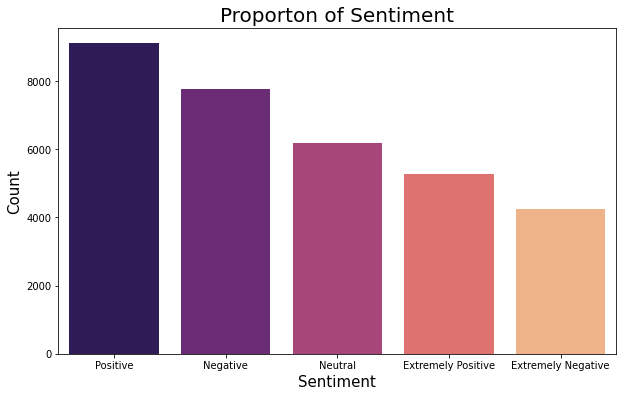

In [19]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="Sentiment", y= 'count',palette = 'magma',data=sentiment_count)
ax.set_title('Proporton of Sentiment', fontsize=20)
ax.set_xlabel("Sentiment",fontsize=15)
ax.set_ylabel("Count",fontsize=15)

Unique value in each feature columns

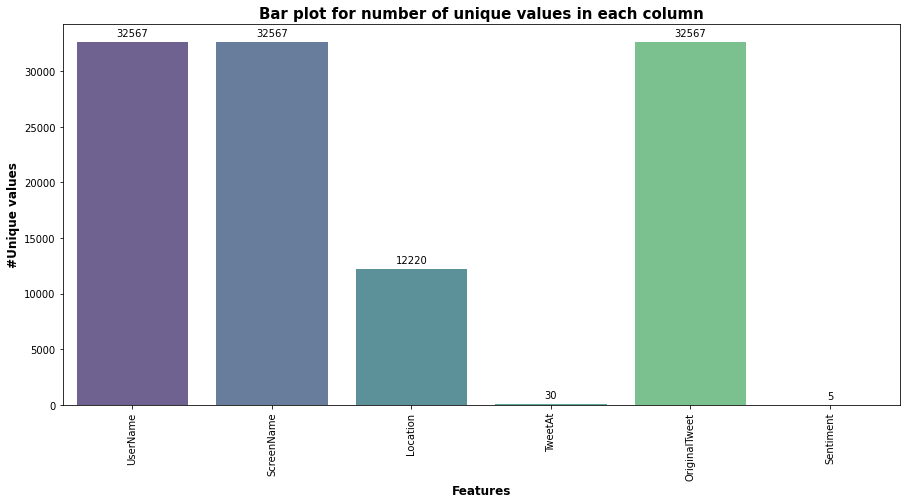

In [20]:
unique_df=pd.DataFrame()
unique_df['Features']=data.columns
unique=[]
for i in data.columns:
  unique.append(data[i].nunique())
unique_df['Uniques']=unique



f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'],palette = 'viridis', alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

CountPlot for OriginalTweet according to "TweetAt" column


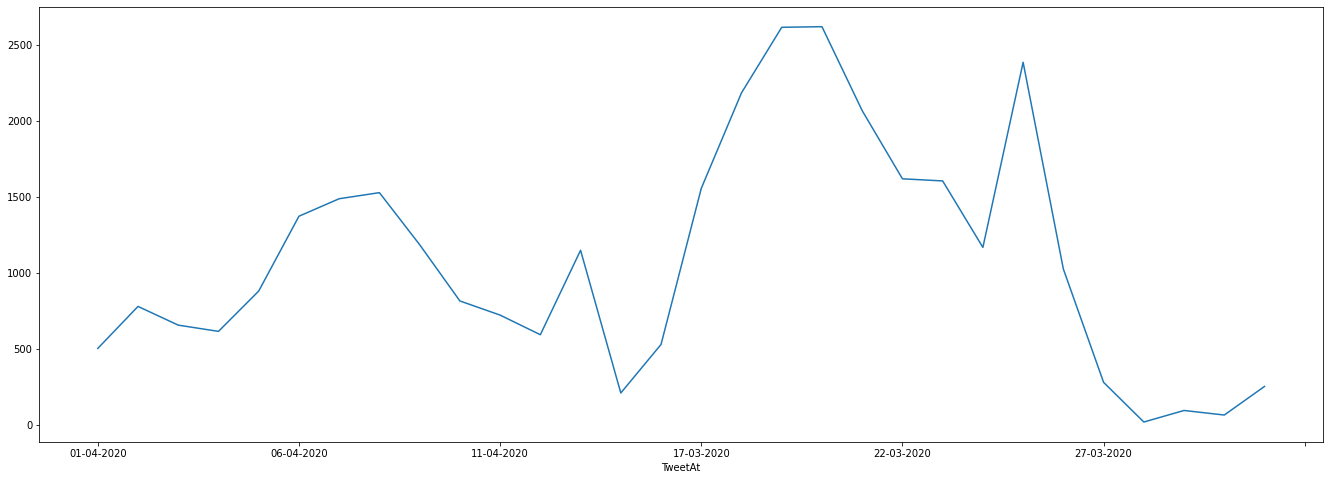

In [21]:
plt.figure(figsize=(23,8))
grp_tweetAt=data.groupby('TweetAt').count()['OriginalTweet'].plot()
plt.show()

Histogram plot of the length of OriginalTweet.


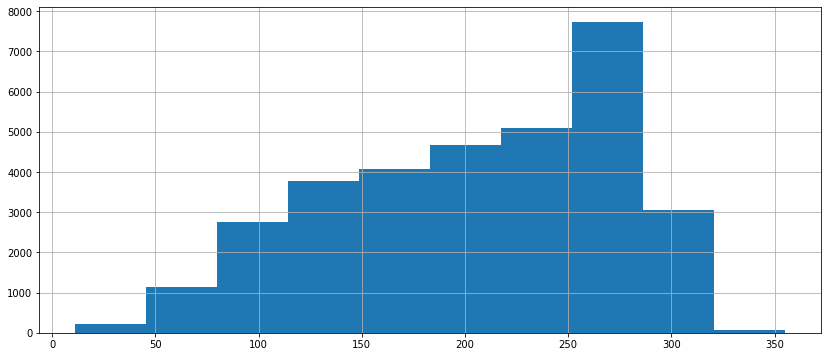

In [22]:
plt.figure(figsize=(14,6))
plt.grid()

plt.hist(data['OriginalTweet'].str.len())
plt.show()

Top 10 Location


In [23]:
location_top10 = data['Location'].value_counts().sort_values(ascending=False)[:10]
location_top10

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

Count Plot of Top 10 Location


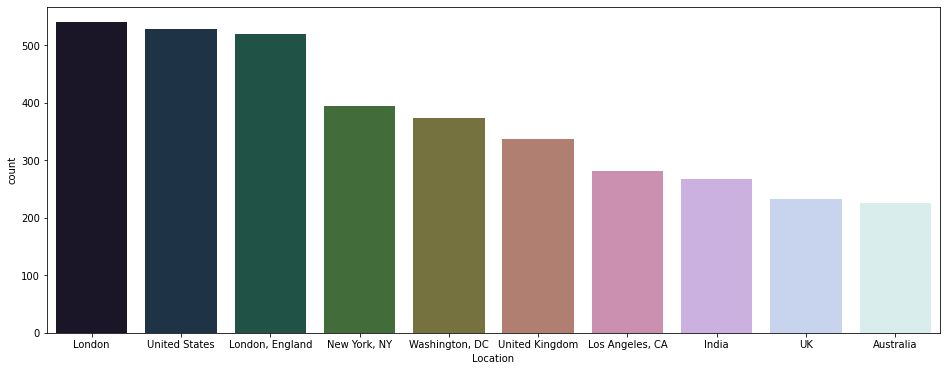

In [24]:
plt.figure(figsize=(16,6))
sns.countplot(data=data[data['Location'].isin(location_top10.index)], x='Location',palette = 'cubehelix',order=location_top10.index)

We can observe that maximum number of tweets are being done from London,New York and Washington DC



In [25]:
replace_values = {"Sentiment": {'Extremely Negative' : 'Negative', 'Extremely Positive' : 'Positive'}}
data = data.replace(replace_values)

In [26]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive


In [27]:
sentiment_count2 = data['Sentiment'].value_counts().reset_index()
sentiment_count2.columns=['Sentiment','count']
sentiment_count2

,Sentiment,count
0,Positive,14383
1,Negative,12012
2,Neutral,6172


Text(0, 0.5, 'Count')

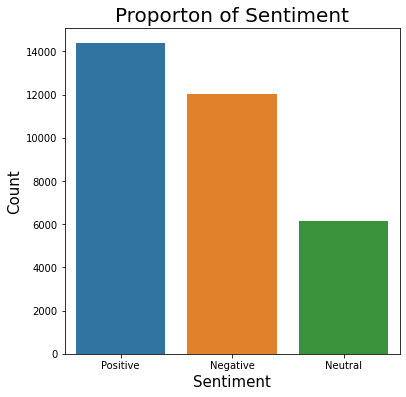

In [28]:
plt.figure(figsize=(6,6))
ax2 = sns.barplot(x="Sentiment", y= 'count', data=sentiment_count2)
ax2.set_title('Proporton of Sentiment', fontsize=20)
ax2.set_xlabel("Sentiment",fontsize=15)
ax2.set_ylabel("Count",fontsize=15)

We use a package wordcloud to display the number of words and their importance in the 'OriginalTweet' column.



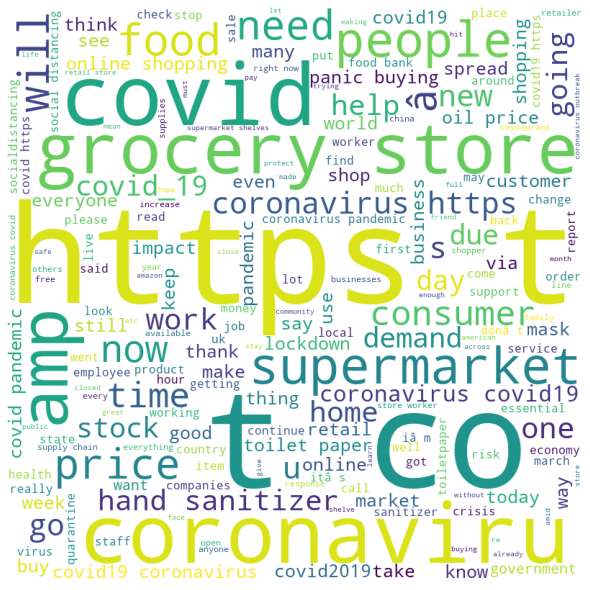

In [29]:
# Python program to generate WordCloud
  ## Based on https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in data.OriginalTweet:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

Cleaning data - Tweets


In [30]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive


Removing Punctuation

In [31]:
## Function to remove punctuation

def remove_punc(text):
  ''' function to remove punctuation'''

  import string

  # replacing the punctuations with no space
  translator = str.maketrans('','', string.punctuation)

  # return the text stripped of punctuation marks
  return text.translate(translator)

In [32]:
data['OriginalTweet'] = data['OriginalTweet'].apply(remove_punc)


In [33]:
data.head()


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,MeNyrbie PhilGahan Chrisitv httpstcoiFz9FAn2Pa...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia Woolworths to give elder...,Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive


Remove stopwords

In [34]:
## Function to remove stopwords

def remove_stopwords(text):
  ''' function to remove stopwords'''
  ## make text smallcase and then remove stopwords
  text = [word.lower() for word in text.split() if word.lower() not in stopwords]

  # joining the list of words with space separator 
  return " ".join(text)

In [35]:
data['OriginalTweet'] = data['OriginalTweet'].apply(remove_stopwords)


In [36]:
data.head()


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,menyrbie philgahan chrisitv httpstcoifz9fan2pa...,Neutral
1,3800,48752,UK,16-03-2020,advice talk neighbours family exchange phone n...,Positive
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworths give elderly ...,Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,news regionâs first confirmed covid19 case ca...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,cashier grocery store sharing insights covid19...,Positive


Stemming

Function for stemming

In [37]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [38]:
data['OriginalTweet']= data['OriginalTweet'].apply(stemming)


EDA SUMMARY

1)Original Dataset contains 6 columns and 41157 rows.

2)Location column contains approx 21% of Null values. so, we have dropped the NaN values.

3)After dropping the nan values we have left with 32567 rows and 6 columns.

4)In order to analyse the data we required only two columns "OriginalTweet" & "Sentiment".

5)The columns such as “UserName” and “ScreenName” does not give any meaningful insights for our analysis.

6)There are five types of sentiments- Extremely Negative, Negative, Neutral, Positive and Extremely Positive.

7)All tweets data collected from the months of March and April 2020. Bar plot shows us the number of unique values in each column.

8)Most of the tweets came from London followed by U.S.

In [39]:
data.head()


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,menyrbi philgahan chrisitv httpstcoifz9fan2pa ...,Neutral
1,3800,48752,UK,16-03-2020,advic talk neighbour famili exchang phone numb...,Positive
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworth give elder dis...,Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,news regionâ first confirm covid19 case came ...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,cashier groceri store share insight covid19 pr...,Positive


Model Training

We will be using tf-idf method for vectorising the text,then we train 5 models namely Random Forest,Logistic Regression,Stochastic Gradient Descent,SVM and Passive Aggressive Classifier.We find that the Logistic Regression has the best accuracy score and thus we choose it for model building.

In [40]:
## defining Independent variable
X = data.OriginalTweet

## defining dependent variable
y = data.Sentiment

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=50)


In [42]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((26053,), (26053,), (6514,), (6514,))

MODEL 1-LOGISTIC REGRESSION

In [43]:
tvec = TfidfVectorizer()
LR = LogisticRegression(solver='lbfgs', max_iter = 10000)

In [44]:
from sklearn.pipeline import Pipeline

model = Pipeline([('vectorizer',tvec),('classifier',LR)])
model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression(max_iter=10000))])

In [45]:
## model prediction
y_pred = model.predict(X_test)

MODEL 2- PASSIVE AGGRESSIVE CLASSIFIER

In [46]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier()
model2 = Pipeline([('vectorizer',tvec),('classifier',pac)])
model2.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', PassiveAggressiveClassifier())])

In [47]:
y_pred_pac=model2.predict(X_test)

*MODEL 3- STOCHASTIC GRADIENT DESCENT CLASSIFIER*

In [48]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

model3 = Pipeline([('vectorizer',tvec),('classifier',sgd_clf)])
model3.fit(X_train,y_train)
y_pred_sgd = model3.predict(X_test)

MODEL 4 - SUPPORT VECTOR MACHINE

In [49]:
from sklearn.svm import SVC

svc = SVC()

model4 = Pipeline([('vectorizer',tvec),('classifier',svc)])
model4.fit(X_train,y_train)
y_pred_svc = model3.predict(X_test)

MODEL 5. RANDOM FOREST

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [51]:
model5 = Pipeline([('vectorizer',tvec),('classifier',rf)])

In [52]:
model5.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [53]:
y_pred_rf = model5.predict(X_test)

Performance Metrics and Accuracy

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


Performance of logistic regression model



In [55]:
print('Accuracy :' ,accuracy_score(y_pred,y_test))
print('Precision :', precision_score(y_pred,y_test, average='weighted'))
print('Recall :', recall_score(y_pred,y_test, average='weighted'))

Accuracy : 0.7711083819465766
Precision : 0.7874144276619056
Recall : 0.7711083819465766


performance of passive aggressive classifier



In [56]:
print('Accuracy :' ,accuracy_score(y_pred_pac,y_test))
print('Precision :', precision_score(y_pred_pac,y_test, average='weighted'))
print('Recall :', recall_score(y_pred_pac,y_test, average='weighted'))

Accuracy : 0.7327295056800737
Precision : 0.7394468879911702
Recall : 0.7327295056800737


Performance of Stochastic gradient Descent Classifier



In [58]:
print('Accuracy :' ,accuracy_score(y_pred_sgd,y_test))
print('Precision :', precision_score(y_pred_sgd,y_test, average='weighted'))
print('Recall :', recall_score(y_pred_sgd,y_test, average='weighted'))

Accuracy : 0.7612833896223519
Precision : 0.8014413251033624
Recall : 0.7612833896223519


Performance of Support Vector Machine



In [59]:
print('Accuracy :' ,accuracy_score(y_pred_svc,y_test))
print('Precision :', precision_score(y_pred_svc,y_test, average='weighted'))
print('Recall :', recall_score(y_pred_svc,y_test, average='weighted'))

Accuracy : 0.7612833896223519
Precision : 0.8014413251033624
Recall : 0.7612833896223519


performance of Random forest classifier



In [60]:
print('Accuracy :' ,accuracy_score(y_pred_rf,y_test))
print('Precision :', precision_score(y_pred_rf,y_test, average='weighted'))
print('Recall :', recall_score(y_pred_rf,y_test, average='weighted'))

Accuracy : 0.7301197420939515
Precision : 0.7360446463412498
Recall : 0.7301197420939515


Trying on new Tweets

In [61]:
Tweet = ['hospitals are good', 'boy is sad',
         'he fell sick', 'he is not satisfied',
        'he is angry with his behaviour', 'taste of food bad', 'snacks are good']
result = model.predict(Tweet)

print(result)

['Positive' 'Negative' 'Negative' 'Neutral' 'Neutral' 'Negative'
 'Positive']


CONCLUSION ON MODEL TRAINING

At the end we conclude our project with 5 models namely Logistic Regression,Random Forest,Stochastic Gradient Descent,SVM and Passive Aggressive Classifier.We are getting the highest accuracy of about 78% with Logistic Regression.We also tested our best models on some new tweet and the results are fairly accurate.